In [1]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

55.0 15.0 2.916666666666666 1 6.0
best split pos before:  4
5
1
4
3
2
0
best split pos after:  4
5
1
4
3
2
0
p from start to pos:  5
p from start to pos:  1
p from start to pos:  4
p from start to pos:  3
inside children imp:  51.0 4.0 15.0 13.0 2.0
55.0 15.0 2.916666666666666 1 6.0
Best split:  2.916666666666666 2.916666666666666 1.1249999999999993 2
2.1875 1.0
2
[[[2.5 ]]

 [[3.25]]

 [[1.  ]]]
[inf -2. -2.]
[2.91666667 2.1875     1.        ]
1
[Text(0.5, 0.75, 'x[0] <= inf\nsquared_error = 2.917\nsamples = 6\nvalue = 2.5'),
 Text(0.25, 0.25, 'squared_error = 2.188\nsamples = 4\nvalue = 3.25'),
 Text(0.75, 0.25, 'squared_error = 1.0\nsamples = 2\nvalue = 1.0')]


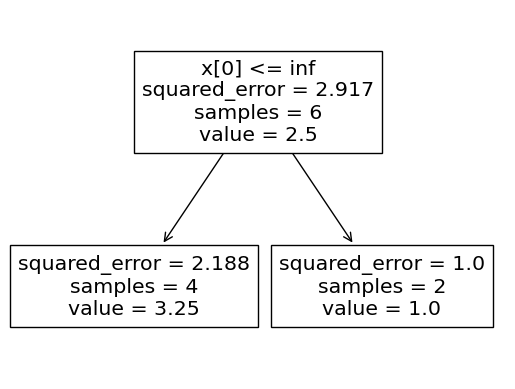

In [3]:
# With this dataset, the missing values will always be sent to the left child
# at the first split. The leaf will be pure.
X = np.array([np.nan, 2, np.nan, 4, 5, 6]).reshape(-1, 1)
# X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.arange(6)

tree = ExtraTreeRegressor(random_state=2, max_depth=1).fit(X, y)
print(tree.tree_.value)
print(tree.tree_.threshold)
print(tree.tree_.impurity)
print(tree.get_depth())

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from pprint import pprint
dtree = plot_tree(tree)
pprint(dtree)
plt.show()

In [3]:
assert all(tree.tree_.impurity >= 0)  # MSE should always be positive
# assert False
# Find the leaves with a single sample where the MSE should be 0
leaves_idx = np.flatnonzero(
    (tree.tree_.children_left == -1) & (tree.tree_.n_node_samples == 1)
)
print(leaves_idx)
assert_allclose(tree.tree_.impurity[leaves_idx], 0.0)

AssertionError: 